### 2. Model



The log data provided by the insurance company has 2 components, the message and the time stamp. Each piece of data has a activity type, including not not limited to: "Quote Started", "Payment Completed", "Claim Started", "Claim Accepted" and "Claim Denied". Our aim is to build a classification model to detect fraudulant incoming claims, given the claim history of each customer. Therefore, "Claim Started", "Claim Accepted" and "Claim Denied" are the most important and are examined individually. 

##### Data Description
The log data provided by the insurance company has 2 components, the message and the time stamp. Each piece of data has a activity type, including but not limited to: "Quote Started", "Payment Completed", "Claim Started", "Claim Accepted" and "Claim Denied". 

The data is in the log form and therefore should go through data cleaning, data transformation and data curation processes to be in tabular form, on which we build a classifer of fraudulant activities. Challenges encountered with this data include:

1. Not all data are relevant. We split the original data according to the activity type. "Claim Started", "Claim Accepted" and "Claim Denied" are the most important ones and are examined individually. 

2. There are several different delimer seperating fields in each piece of data. For example, the case ID, platform and activity_type are separated by "-", whereas the time stamp and the rest of the information is separated by ",".

3. Due to confidentiality concerns, the insurance company's clients' information are transfromed and substitued by pseudo names. No meaningful conclusion can be drawn from these names and addresses directluy, but the distribution of these data are kept intact. 

4. One customer ID could correspond to different payload, in which they submit different information about their households and homes. One customer ID could also submit multiple claims and there is no given link between a "Claim Started" and "Claim Denied" or "Claim Accepted" cases. We will process the data on the assumption that each "Claim Started" case corresponds to the most recent submitted payload from "Quote Completed". Also, each "Claim Denied" or "Claim Accepted" corresponds to the most recent "Claim Started".  The customers with more than one payload and those who submitted more than one claims only constitute a small proportion of all data.

We aim to give all the "Claim Started" cases a label (fraud or not) along with some features extracted mainly from the "Quote Completed" data. At last we build a classification model to detect fraudulant incoming claims, given the claim history of each customer. 

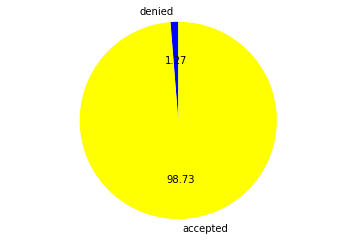

In [12]:
%matplotlib inline
import matplotlib.pyplot as plotter
colors  = ("blue", "yellow")
pieLabels              = 'denied', 'accepted'
populationShare     = [10494, 816301]

figureObject, axesObject = plotter.subplots()
axesObject.pie(populationShare,
        labels=pieLabels,
        colors = colors,
        autopct='%1.2f',
        startangle=90)
axesObject.axis('equal')
plotter.show()

We have discovered that the customers in this dataset can start multiple quotes and claims, which makes our analysis more complicated. Fortunately, only a smally portion of the customers who started multiple quotes were both denied and accepted at some point. The rest of the population either gets denied all the time or accepted all the time. 

An important feature that really separates the frauds from the norm is whether the timeStamp of activity "Payment Completed" and "Claim Started" are the same. Interestingly, all of the claims labelled fraud in this dataset has this property, but not the other way around. 

In [26]:
%%latex 
$$ P( fraud | matching \ timeStamp ) = \frac{ P(fraud \ \& \ matching \ timeStamp) }{P(matching \ timeStamp)} = 10494/12377 = 0.8479 $$

<IPython.core.display.Latex object>

1. how many claims, how many accepted, how many denied 

2. 

### 3. Analysis